<div class="alert alert-block alert-danger">
    
### Notes - 

</div>

### Cross Correlations, Numerical python, $ \ldots $.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.tsa.stattools import ccf

In [3]:
np.random.seed(1234)

In [4]:
s_data = pd.read_csv('s.dat', header=None)
s_data.shape

(453, 1)

In [5]:
r_data = pd.read_csv('r.dat', header=None)
r_data.shape

(453, 1)

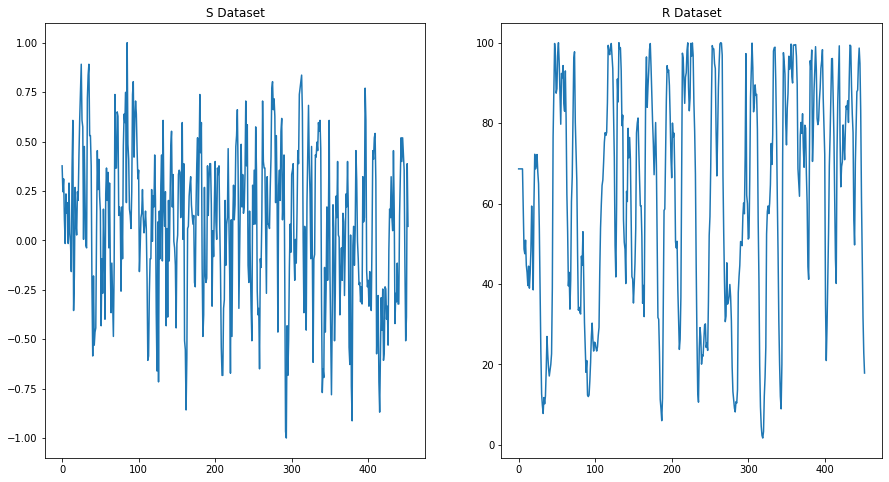

In [6]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('S Dataset')
plt.plot(np.arange(len(s_data)), s_data)
plt.subplot(1,2,2)
plt.title('R Dataset')
plt.plot(np.arange(len(r_data)), r_data);

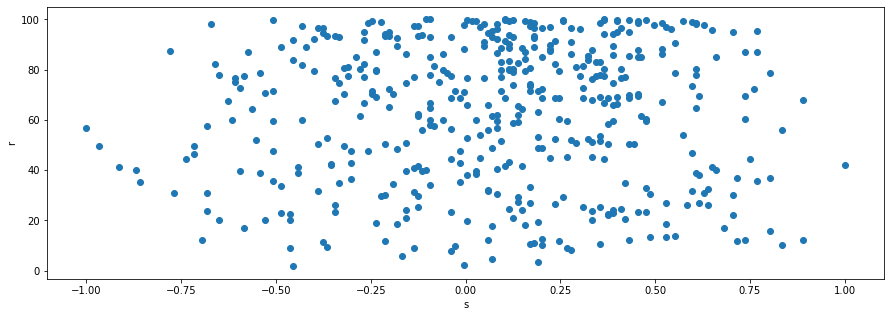

In [7]:
plt.figure(figsize=(15,5))
plt.xlabel('s')
plt.ylabel('r')
plt.scatter(s_data, r_data);

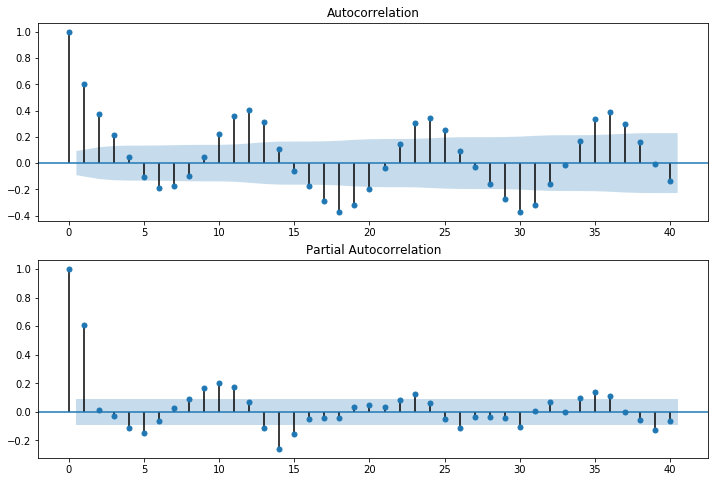

In [8]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(s_data, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(s_data, lags=40, ax=ax2)

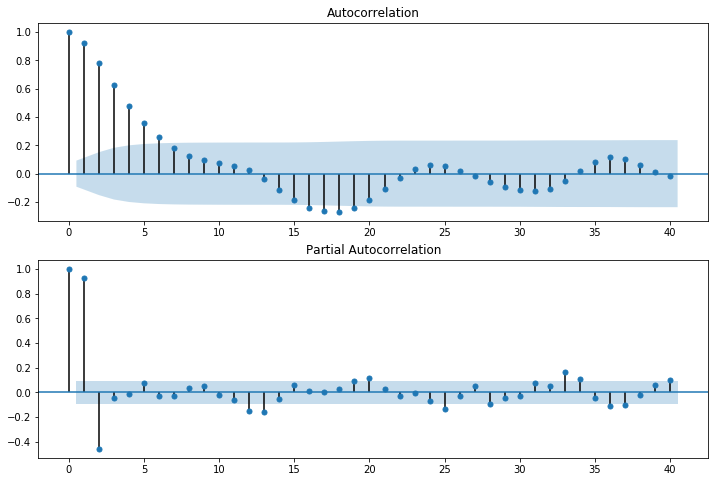

In [9]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(r_data, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(r_data, lags=40, ax=ax2)

In [10]:
ccf_data = ccf(s_data.to_numpy().flatten(), r_data.to_numpy().flatten())
print('CCF: ', ccf_data[:10])

CCF:  [ 0.02495391 -0.01280994 -0.08685193 -0.15476835 -0.22953223 -0.26182306
 -0.23461411 -0.14605714 -0.0177076   0.09622013]


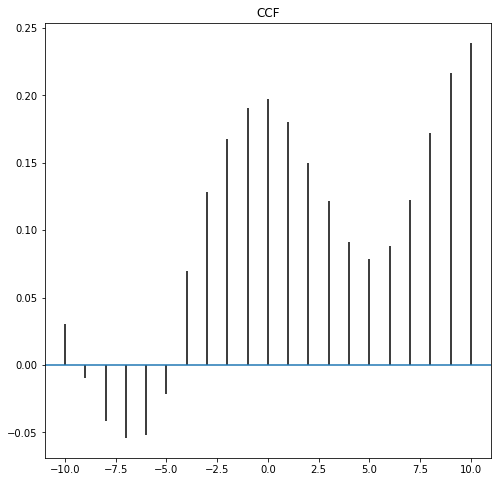

In [11]:
plt.figure(figsize=(8,8))
plt.title('CCF')
plt.xcorr(s_data.to_numpy().flatten(), r_data.to_numpy().flatten());

In [12]:
df_all = pd.concat([s_data, r_data], axis=1)
df_all.columns=['s','r']
df_all.head()

,s,r
0,0.377,68.63
1,0.246,68.63
2,0.311,68.63
3,0.104,68.63
4,-0.016,68.63


In [13]:
reg = smf.ols('r ~ s', data=df_all)
reg_res = reg.fit()
reg_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      r   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2810
Date:                Sun, 22 Mar 2020   Prob (F-statistic):              0.596
Time:                        03:02:19   Log-Likelihood:                -2151.3
No. Observations:                 453   AIC:                             4307.
Df Residuals:                     451   BIC:                             4315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.1168      1.344     46.216      0.000      59.475      64.758
s              1.8240      3.441      0.530      0.596      -4.938       8.586
==============================================================================
Omnibus:                      141.127   Durbin-Watson:                   0.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.357
Skew:                          -0.392   Prob(JB):                     5.71e-08
Kurtosis:                       1.927   Cond. No.                         2.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df_all['s_lag5'] = df_all['s'].shift(5)
df_all['s_lag6'] = df_all['s'].shift(6)
df_all['s_lag7'] = df_all['s'].shift(7)
df_all['s_lag8'] = df_all['s'].shift(8)
df_all['s_lag9'] = df_all['s'].shift(9)
df_all['s_lag10'] = df_all['s'].shift(10)
df_all['r_lag1'] = df_all['r'].shift(1)
df_all['r_lag2'] = df_all['r'].shift(2)

df_all.head(15)

,s,r,s_lag5,s_lag6,s_lag7,s_lag8,s_lag9,s_lag10,r_lag1,r_lag2
0,0.377,68.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.246,68.63,NaN,NaN,NaN,NaN,NaN,NaN,68.63,NaN
2,0.311,68.63,NaN,NaN,NaN,NaN,NaN,NaN,68.63,68.63
3,0.104,68.63,NaN,NaN,NaN,NaN,NaN,NaN,68.63,68.63
4,-0.016,68.63,NaN,NaN,NaN,NaN,NaN,NaN,68.63,68.63
5,0.235,68.63,0.377,NaN,NaN,NaN,NaN,NaN,68.63,68.63
6,0.137,59.16,0.246,0.377,NaN,NaN,NaN,NaN,68.63,68.63
7,0.191,48.70,0.311,0.246,0.377,NaN,NaN,NaN,59.16,68.63
8,-0.016,47.54,0.104,0.311,0.246,0.377,NaN,NaN,48.70,59.16
9,0.290,50.91,-0.016,0.104,0.311,0.246,0.377,NaN,47.54,48.70


In [15]:
reg = smf.ols('r ~ s_lag5+s_lag6+s_lag7+s_lag8+s_lag9+s_lag10', data=df_all)
reg_res = reg.fit()
reg_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      r   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     121.2
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           1.22e-89
Time:                        03:02:19   Log-Likelihood:                -1891.0
No. Observations:                 443   AIC:                             3796.
Df Residuals:                     436   BIC:                             3825.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.2743      0.870     79.601      0.000      67.564      70.985
s_lag5       -23.8255      2.766     -8.615      0.000     -29.261     -18.390
s_lag6       -15.3775      3.165     -4.858      0.000     -21.598      -9.157
s_lag7       -11.7711      3.166     -3.717      0.000     -17.995      -5.548
s_lag8       -11.3008      3.166     -3.569      0.000     -17.524      -5.078
s_lag9        -9.1525      3.165     -2.892      0.004     -15.373      -2.932
s_lag10      -16.7219      2.769     -6.038      0.000     -22.165     -11.279
==============================================================================
Omnibus:                       15.962   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.689
Skew:                          -0.450   Prob(JB):                     0.000238
Kurtosis:                       3.308   Cond. No.                         5.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""